In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings

from scipy.cluster.hierarchy import dendrogram, ward
warnings.filterwarnings("ignore")

In [2]:
female_age_data = pd.read_csv("../data-collect/female_age_data.csv", index_col="Unnamed: 0")
male_age_data = pd.read_csv("../data-collect/male_age_data.csv", index_col="Unnamed: 0")

In [3]:
print(female_age_data.shape)
female_age_data.head()

(63, 103)


,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
10026,216,212,225,189,208,192,190,205,181,195,...,14,6,7,7,4,4,5,2,0,0
10027,354,329,320,323,308,270,291,284,280,284,...,16,10,17,17,13,9,5,13,1,0
10030,167,197,155,191,165,158,150,168,146,150,...,12,5,6,7,3,3,0,1,1,0
10037,81,101,94,93,92,87,64,83,78,83,...,11,17,20,18,14,4,2,10,1,0
10039,184,150,167,152,146,169,152,160,165,178,...,14,8,10,6,2,1,4,8,0,0


In [4]:
print(male_age_data.shape)
male_age_data.head()

(63, 103)


,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
10026,217,203,203,179,160,179,189,208,217,182,...,11,1,1,2,0,0,1,2,1,0
10027,355,333,291,281,279,289,272,287,299,300,...,6,6,3,4,1,2,0,0,0,0
10030,181,173,169,169,170,196,164,160,157,148,...,3,0,1,0,0,0,1,1,0,0
10037,91,94,89,77,73,80,94,79,93,88,...,5,4,4,2,3,1,0,3,0,0
10039,168,167,175,171,175,179,196,176,153,169,...,4,4,0,4,1,0,1,0,0,0


# Dendrogram

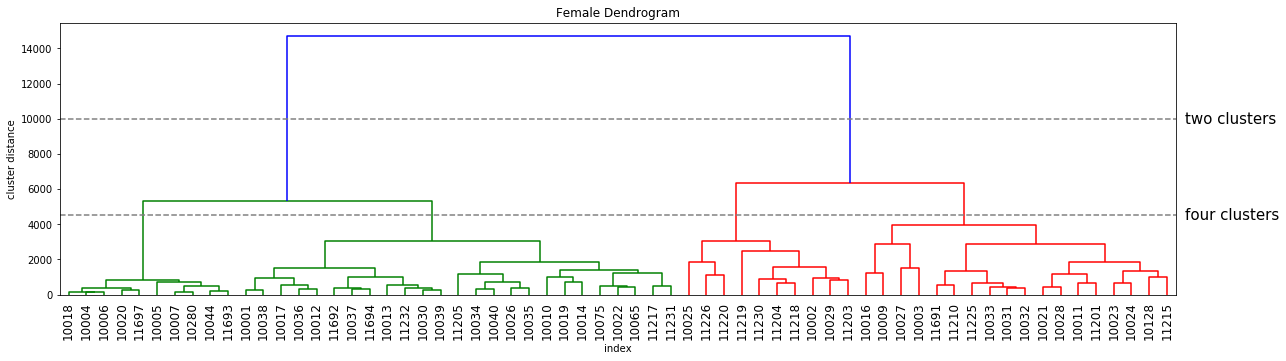

In [5]:
plt.figure(figsize=(20, 5))
linkage_array = ward(female_age_data)
dendrogram(linkage_array, leaf_font_size=12)

h_line = [10000, 4500, ]

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [h_line[0], h_line[0]], '--', c='grey')
ax.plot(bounds, [h_line[1], h_line[1]], '--', c='grey')
# ax.plot(bounds, [h_line[2], h_line[2]], '--', c='grey')

ax.text(bounds[1]+5, h_line[0], 'two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1]+5, h_line[1], 'four clusters', va='center', fontdict={'size': 15})
# ax.text(bounds[1]+5, h_line[2], 'six clusters', va='center', fontdict={'size': 15})

ax.set_xlabel("index")
ax.set_ylabel("cluster distance")
ax.set_xticklabels([female_age_data.index[int(i.get_text())] for i in ax.get_xticklabels()])
ax.set_title("Female Dendrogram")
plt.show()

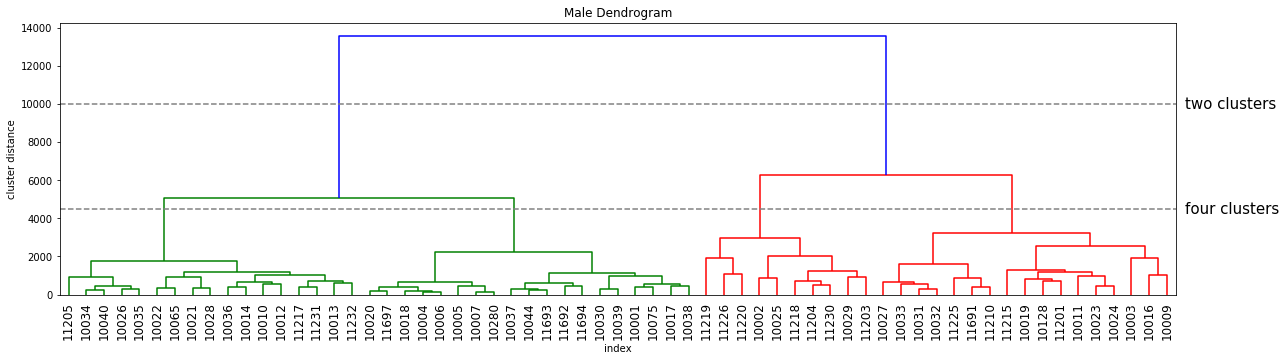

In [6]:
plt.figure(figsize=(20, 5))
linkage_array = ward(male_age_data)
dendrogram(linkage_array, leaf_font_size=12)

h_line = [10000, 4500, ]

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [h_line[0], h_line[0]], '--', c='grey')
ax.plot(bounds, [h_line[1], h_line[1]], '--', c='grey')
# ax.plot(bounds, [h_line[2], h_line[2]], '--', c='grey')

ax.text(bounds[1]+5, h_line[0], 'two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1]+5, h_line[1], 'four clusters', va='center', fontdict={'size': 15})
# ax.text(bounds[1]+5, h_line[2], 'six clusters', va='center', fontdict={'size': 15})

ax.set_xlabel("index")
ax.set_ylabel("cluster distance")
ax.set_xticklabels([male_age_data.index[int(i.get_text())] for i in ax.get_xticklabels()])
ax.set_title("Male Dendrogram")
plt.show()

In [7]:
df_merge = pd.merge(female_age_data.rename(columns=lambda col: "female_%s" % col),
                    male_age_data.rename(columns=lambda col: "male_%s" % col), 
                    left_index=True, right_index=True)

In [8]:
df_merge.head()

,female_0,female_1,female_2,female_3,female_4,female_5,female_6,female_7,female_8,female_9,...,male_93,male_94,male_95,male_96,male_97,male_98,male_99,male_100,male_101,male_102
10026,216,212,225,189,208,192,190,205,181,195,...,11,1,1,2,0,0,1,2,1,0
10027,354,329,320,323,308,270,291,284,280,284,...,6,6,3,4,1,2,0,0,0,0
10030,167,197,155,191,165,158,150,168,146,150,...,3,0,1,0,0,0,1,1,0,0
10037,81,101,94,93,92,87,64,83,78,83,...,5,4,4,2,3,1,0,3,0,0
10039,184,150,167,152,146,169,152,160,165,178,...,4,4,0,4,1,0,1,0,0,0


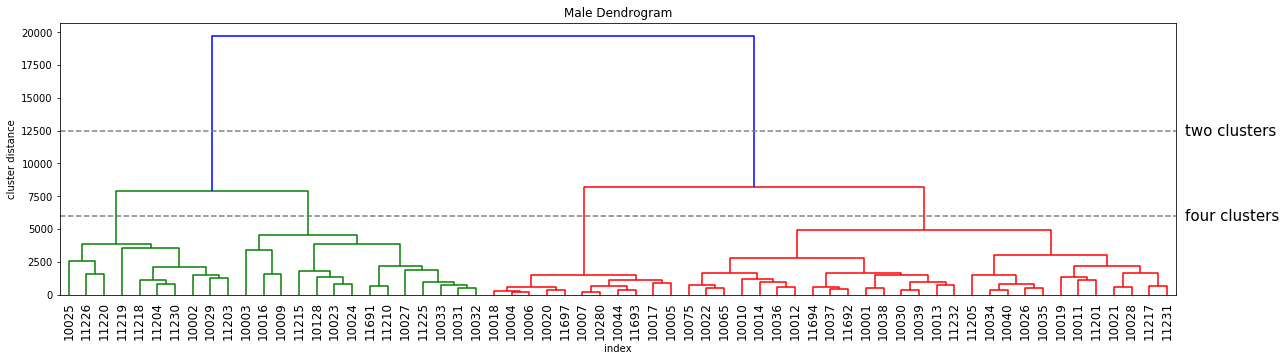

In [9]:
plt.figure(figsize=(20, 5))
linkage_array = ward(df_merge)
dendrogram(linkage_array, leaf_font_size=12)

h_line = [12500, 6000, ]

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [h_line[0], h_line[0]], '--', c='grey')
ax.plot(bounds, [h_line[1], h_line[1]], '--', c='grey')
# ax.plot(bounds, [h_line[2], h_line[2]], '--', c='grey')

ax.text(bounds[1]+5, h_line[0], 'two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1]+5, h_line[1], 'four clusters', va='center', fontdict={'size': 15})
# ax.text(bounds[1]+5, h_line[2], 'six clusters', va='center', fontdict={'size': 15})

ax.set_xlabel("index")
ax.set_ylabel("cluster distance")
ax.set_xticklabels([df_merge.index[int(i.get_text())] for i in ax.get_xticklabels()])
ax.set_title("Male Dendrogram")
plt.show()

# Cluster into 4 Groups

In [10]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, silhouette_samples,adjusted_rand_score
from sklearn.base import clone

In [11]:
def cluster_stability(data, model, n_iter=10):
    labels, indices = list(), list()
    rng = np.random.RandomState(1)

    for i in range(n_iter):
        # draw bootstrap samples, store indices
        sample_indices = rng.randint(0, data.shape[0], data.shape[0])
        indices.append(sample_indices)
        model = clone(model)
        if hasattr(model, "random_state"):
            # randomize estimator if possible
            model.random_state = rng.randint(1e5)
        try:  # numpy array or list
            data_bootstrap = np.array(data)[sample_indices]
        except TypeError:  # pandas data frame
            data_bootstrap = data.iloc[sample_indices]
        model.fit(data_bootstrap)
        # store clustering outcome using original indices
        relabel = -np.ones(data.shape[0], dtype=np.int)
        relabel[sample_indices] = model.labels_
        labels.append(relabel)

    scores = list()
    for l, i in zip(labels, indices):
        for k, j in zip(labels, indices):
            # we also compute the diagonal which is a bit silly
            in_both = np.intersect1d(i, j)
            scores.append(adjusted_rand_score(l[in_both], k[in_both]))

    return model, np.mean(scores)

In [12]:
def silhouette_plot(train_data, predict_data, n_clusters, score=None):
    fig = plt.figure()
    # fig.set_size_inches(18, 7)
    plt.title(("Silhouette plot w/ n_clusters = %d" % n_clusters),
              fontsize=14, fontweight='bold')

    # The silhouette coefficient can range from -1, 1
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    plt.xlim([-0.2, 1])
    plt.ylim([0, len(train_data) + (n_clusters + 1) * 10])

    # Compute the silhouette scores for each sample
    silhouette_values = silhouette_samples(train_data, predict_data)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sorted(silhouette_values[predict_data == i])

        size_cluster_i = len(ith_cluster_silhouette_values)
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    if score is not None:
        plt.axvline(x=score, color="red", linestyle="--")

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()


## KMeans

In [13]:
params = {"n_clusters": [2, 3, 4, 5]}
kmeans = GridSearchCV(KMeans(), param_grid=params, cv=5)
kmeans.fit(df_merge)
kmeans.best_params_

{'n_clusters': 4}

In [14]:
silhouette_score(df_merge, kmeans.best_estimator_.labels_)

0.32784671751278294

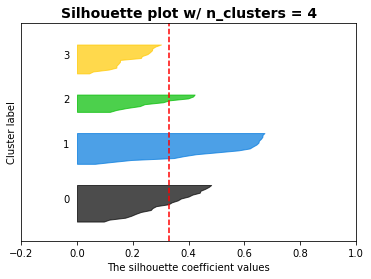

In [15]:
silhouette_plot(df_merge, kmeans.best_estimator_.labels_, 4, score=0.33)

In [16]:
_, stability_score = cluster_stability(df_merge, KMeans(n_clusters=4), n_iter=10)
stability_score

0.7897951753273805

In [17]:
kmeans.best_estimator_.labels_

array([0, 3, 0, 1, 1, 1, 3, 1, 0, 1, 0, 2, 0, 0, 3, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 2, 3, 3, 0, 0, 1, 0, 0, 3, 3, 3, 2, 3, 3, 3, 0, 0, 3,
       1, 1, 1, 1, 2, 2, 2, 2, 3, 0, 3, 0, 0, 2, 3, 3, 2, 2, 0],
      dtype=int32)

## Agglomerative

In [18]:
params = {"n_clusters": [2, 3, 4, 5]}

for nc in params["n_clusters"]:
    _, stability_score = cluster_stability(df_merge, AgglomerativeClustering(n_clusters=nc), n_iter=10)
    model = AgglomerativeClustering(n_clusters=nc)
    model.fit(df_merge)
    print("# Clusters: %d | Stability: %.4f | Silhouette: %.4f" % (nc, stability_score, silhouette_score(df_merge, model.labels_)))

# Clusters: 2 | Stability: 0.7027 | Silhouette: 0.4625
# Clusters: 3 | Stability: 0.6041 | Silhouette: 0.3178
# Clusters: 4 | Stability: 0.6938 | Silhouette: 0.2968
# Clusters: 5 | Stability: 0.7619 | Silhouette: 0.2375


## DBSCAN

In [19]:
for min_samples in range(1, 21):
    for eps in range(1, 14):
        db = DBSCAN(eps=eps*1000, min_samples=min_samples)
        clustered_data = db.fit_predict(df_merge)
        
        y_predict = np.unique(clustered_data)
        n_clusters = len(y_predict)
        if n_clusters > 3 or (n_clusters >= 2 and -1 not in y_predict):
            print("Min Samples:", min_samples)
            print("Eps:", eps*1000)
            print("Silhouette:", silhouette_score(df_merge, clustered_data))
            print(y_predict, "\n")

Min Samples: 1
Eps: 1000
Silhouette: 0.1580569195535736
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] 

Min Samples: 1
Eps: 2000
Silhouette: 0.3983743518003738
[0 1 2] 

Min Samples: 2
Eps: 1000
Silhouette: 0.19996099485616425
[-1  0  1  2  3  4] 

Min Samples: 3
Eps: 1000
Silhouette: 0.18400572614686556
[-1  0  1  2] 



In [20]:
db = DBSCAN(eps=2000, min_samples=1)
clustered_data = db.fit_predict(df_merge)
clustered_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [21]:
silhouette_score(df_merge, clustered_data)

0.3983743518003738

In [22]:
_, stability_score = cluster_stability(df_merge, DBSCAN(eps=2000, min_samples=1), n_iter=10)
stability_score

0.7615357501047917

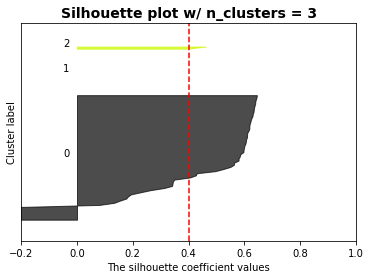

In [23]:
silhouette_plot(df_merge, clustered_data, 3, score=0.40)

## KMeans Detail

### n_clusters = 3, cuz DBSCAM suggest

In [24]:
km_3 = KMeans(n_clusters=3)
km_3.fit(df_merge)
silhouette_score(df_merge, km_3.labels_)

0.3876563409967513

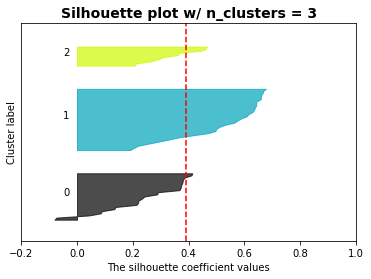

In [25]:
silhouette_plot(df_merge, km_3.labels_, 3, score=0.39)

In [26]:
_, stability_score = cluster_stability(df_merge, KMeans(n_clusters=3), n_iter=10)
stability_score

0.6765739528644319

### n_clusters = 5, cuz Agglormerative states it's more stable 

In [27]:
km_5 = KMeans(n_clusters=5)
km_5.fit(df_merge)
silhouette_score(df_merge, km_5.labels_)

0.3173832984424847

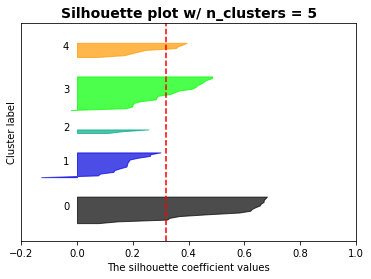

In [28]:
silhouette_plot(df_merge, km_5.labels_, 5, score=0.32)

In [29]:
_, stability_score = cluster_stability(df_merge, KMeans(n_clusters=5), n_iter=10)
stability_score

0.7233520721473127

#### KMeans has better performace compared to the other models. KMeans w/ 4 clusters gives us the most stable model. However, KMeans w/ 3 clusters has the highest *silhouette* score. I do not consider ARI, NMI, or etc because the data does not contain true label. Since there is only 63 rows (zip codes), it will be good to assign the label manually. KMeans provides us w/ a good idea to seperate our dataset into 3 or 4 different groups.

Text(0.5,1,'Elbow for KMeans clustering')

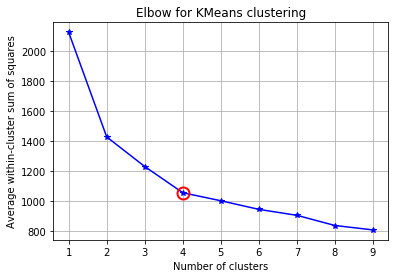

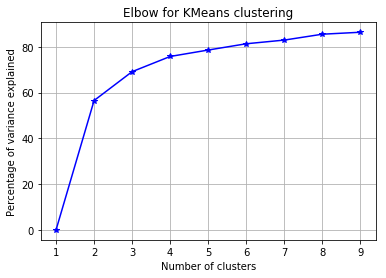

In [38]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

K = range(1,10)
KM = [KMeans(n_clusters=k).fit(df_merge) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(df_merge, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/df_merge.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(df_merge)**2)/df_merge.shape[0]
bss = tss-wcss

kIdx = 4-1

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')